# Analyst Builder: Pandas for Data Analysis - Course 3

## 1.0 Data Cleaning and Pre-Processing

### 1.1 Data Cleaning Introduction
- **Data Cleaning**:
  - Taking the raw data and making it more usable for the end project
  - Continuous process and not done just at the beginning of a project
  - Data need to be cleaned if there are:
    - Missing values
    - Duplicates
    - Incongruent data formats
    - etc.

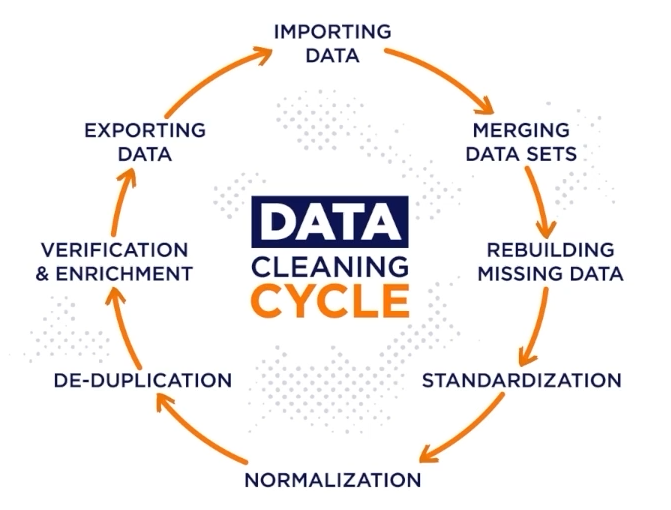

### 1.2 Dealing with Duplicates

In [ ]:
# Setup
import pandas as pd
from IPython.display import display_html

data1 = {
    'Transaction ID': [101, 102, 103, 103, 104, 105, 106],
    'Customer Name': ['Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Ron Weasley', 'Draco Malfoy', 'Luna Lovegood', 'Draco Malfoy'],
    'Wand': ['Elder Wand', 'Vine Wood', 'Hawthorn', 'Hawthorn', 'Dragon Heartstring', 'Thestral Tail Hair', 'Dragon Heartstring'],
    'Price': [100, 75, 50, 50, 80, 60, 80]
}

Wand_Transactions = pd.DataFrame(data1)

data2 = {
    'First Name': ['Harry', 'Hermione', 'Ron', 'Harry', 'Draco', 'Luna', 'Harry'],
    'Last Name': ['Potter', 'Granger', 'Weasley', 'Potter', 'Malfoy', 'Lovegood', 'Potter'],
    'Hogwarts House': ['Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Ravenclaw', 'Gryffindor'],
    'Favorite Class': ['Defense Against the Dark Arts', 'Potions', 'Charms', 'Quidditch', 'Transfiguration', 'Care of Magical Creatures', 'Herbology']
}

Class_List = pd.DataFrame(data2)

# Displaying both DataFrames side by side
space = "<div style='display:inline-block; width: 50px;'></div>"

display_html(
    Wand_Transactions.style.set_table_attributes("style='display:inline; margin-right: 50px;'")._repr_html_() +
    space +
    Class_List.style.set_table_attributes("style='display:inline'")._repr_html_(),
    raw=True
)

,Transaction ID,Customer Name,Wand,Price
0,101,Harry Potter,Elder Wand,100
1,102,Hermione Granger,Vine Wood,75
2,103,Ron Weasley,Hawthorn,50
3,103,Ron Weasley,Hawthorn,50
4,104,Draco Malfoy,Dragon Heartstring,80
5,105,Luna Lovegood,Thestral Tail Hair,60
6,106,Draco Malfoy,Dragon Heartstring,80
,First Name,Last Name,Hogwarts House,Favorite Class
0,Harry,Potter,Gryffindor,Defense Against the Dark Arts
1,Hermione,Granger,Gryffindor,Potions


In [ ]:
# 1.1.1 Remove duplicates via drop_duplicates()

Wand_Transactions.drop_duplicates() # Removes duplicate rows based on 'First Name' and 'Last Name', keeping the first occurrence.

,Transaction ID,Customer Name,Wand,Price
0,101,Harry Potter,Elder Wand,100
1,102,Hermione Granger,Vine Wood,75
2,103,Ron Weasley,Hawthorn,50
4,104,Draco Malfoy,Dragon Heartstring,80
5,105,Luna Lovegood,Thestral Tail Hair,60
6,106,Draco Malfoy,Dragon Heartstring,80


In [ ]:
# 1.1.2 Remove duplicates via drop_duplicates()

Class_List.drop_duplicates(subset = ['First Name','Last Name'], keep = 'first') # Removes duplicate rows based on 'First Name' and 'Last Name', keeping the last occurrence.

,First Name,Last Name,Hogwarts House,Favorite Class
0,Harry,Potter,Gryffindor,Defense Against the Dark Arts
1,Hermione,Granger,Gryffindor,Potions
2,Ron,Weasley,Gryffindor,Charms
4,Draco,Malfoy,Slytherin,Transfiguration
5,Luna,Lovegood,Ravenclaw,Care of Magical Creatures


In [ ]:
# 1.1.2 Remove duplicates via drop_duplicates()

Class_List.drop_duplicates(subset = ['First Name','Last Name'], keep = 'last') # Dropping duplicates for

,First Name,Last Name,Hogwarts House,Favorite Class
1,Hermione,Granger,Gryffindor,Potions
2,Ron,Weasley,Gryffindor,Charms
4,Draco,Malfoy,Slytherin,Transfiguration
5,Luna,Lovegood,Ravenclaw,Care of Magical Creatures
6,Harry,Potter,Gryffindor,Herbology


### 1.3 Standardizing Data

In [ ]:
# Setup (Scenario 1)

data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'full_name': ['Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Draco Malfoy', 'Luna Lovegood', 'Neville Longbottom', 'Ginny Weasley', 'Fred Weasley', 'George Weasley', 'Cho Chang'],
    'phone_number': ['(123) 456-7890', '555-123-4567', '9876543210', '123.456.7890', '(123)-4567890', '987-654-3210', '123 456 7890', '1234567890', '+7890123456', '012-345-6789']
}

Bad_Numbers = pd.DataFrame(data)
Bad_Numbers

,student_id,full_name,phone_number
0,1,Harry Potter,(123) 456-7890
1,2,Hermione Granger,555-123-4567
2,3,Ron Weasley,9876543210
3,4,Draco Malfoy,123.456.7890
4,5,Luna Lovegood,(123)-4567890
5,6,Neville Longbottom,987-654-3210
6,7,Ginny Weasley,123 456 7890
7,8,Fred Weasley,1234567890
8,9,George Weasley,+7890123456
9,10,Cho Chang,012-345-6789


In [ ]:
# 1.1.1 Standardizing data: Scenario 1 (Phone Numbers) via regex

# Remove all non-digit characters from the 'phone_number' column
Bad_Numbers['phone_number'] = Bad_Numbers['phone_number'].str.replace(r'\D', '', regex=True)

In [ ]:
# 1.1.2 Standardizing data: Scenario 1 (Phone Numbers) via regex

# Count phone numbers that do not have exactly 10 digits
len(Bad_Numbers[Bad_Numbers['phone_number'].str.len() != 10])

0

In [ ]:
# 1.1.3 Standardizing data: Scenario 1 (Phone Numbers) via regex
Bad_Numbers['phone_number'] = Bad_Numbers['phone_number'].str[:3] + '-' + Bad_Numbers['phone_number'].str[3:6] + '-' + Bad_Numbers['phone_number'].str[6:]
Bad_Numbers

# Reformat the phone numbers into the standard format (XXX-XXX-XXXX)

,student_id,full_name,phone_number
0,1,Harry Potter,123-456-7890
1,2,Hermione Granger,555-123-4567
2,3,Ron Weasley,987-654-3210
3,4,Draco Malfoy,123-456-7890
4,5,Luna Lovegood,123-456-7890
5,6,Neville Longbottom,987-654-3210
6,7,Ginny Weasley,123-456-7890
7,8,Fred Weasley,123-456-7890
8,9,George Weasley,789-012-3456
9,10,Cho Chang,012-345-6789


In [ ]:
# Setup (Scenario 2)

data = {
    'Full Name': ['Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Draco Malfoy', 'Luna Lovegood', 'Gregory Goyle'],
    'Voldemort_Bad': ['Y', 'Yes', 'Yes', 'No', 'yes', 'Nope!']
}

Voldy = pd.DataFrame(data)
Voldy

,Full Name,Voldemort_Bad
0,Harry Potter,Y
1,Hermione Granger,Yes
2,Ron Weasley,Yes
3,Draco Malfoy,No
4,Luna Lovegood,yes
5,Gregory Goyle,Nope!


In [ ]:
# 1.2.1 Standardizing data: Scenario 2 (Standardize Yes and No)

Voldy['Voldemort_Bad'] = Voldy['Voldemort_Bad'].apply(lambda x: 'Yes' if x.startswith(('Y','y')) else ('No' if x.startswith(('N','n')) else x))
Voldy

# Standardize values in 'Voldemort_Bad' column to 'Yes' or 'No' based on initial letter

,Full Name,Voldemort_Bad
0,Harry Potter,Yes
1,Hermione Granger,Yes
2,Ron Weasley,Yes
3,Draco Malfoy,No
4,Luna Lovegood,Yes
5,Gregory Goyle,No


In [ ]:
# Setup (Scenario 3)

data = {
    'First Name': ['Harry', 'Hermione', 'Ron', 'Hermione', 'Ronald', 'Harry', 'Hermion', 'Ron'],
    'Last Name': ['Potter', 'Granger', 'Weasley', 'Grangar', 'Weasly', 'Poter', 'Graner', 'Weaseley'],
    'Age': [18, 17, 18, 17, 18, 18, 17, 18],
    'Social Security Number': ['123-45-6789', '987-65-4321', '555-55-5555', '987-65-4321', '555-55-5555',
                               '123-45-6789', '987-65-4321', '555-55-5555']
}

Hogwarts_Students = pd.DataFrame(data)
Hogwarts_Students

,First Name,Last Name,Age,Social Security Number
0,Harry,Potter,18,123-45-6789
1,Hermione,Granger,17,987-65-4321
2,Ron,Weasley,18,555-55-5555
3,Hermione,Grangar,17,987-65-4321
4,Ronald,Weasly,18,555-55-5555
5,Harry,Poter,18,123-45-6789
6,Hermion,Graner,17,987-65-4321
7,Ron,Weaseley,18,555-55-5555


In [ ]:
# 1.3.1 Standardizing Data (Scenario 3) - Standardize names
Hogwarts_Students['Same_Student_ID'] = Hogwarts_Students.groupby('Social Security Number').ngroup()
Hogwarts_Students

# Create a unique student ID based on the 'Social Security Number' using group numbering

,First Name,Last Name,Age,Social Security Number,Same_Student_ID
0,Harry,Potter,18,123-45-6789,0
1,Hermione,Granger,17,987-65-4321,2
2,Ron,Weasley,18,555-55-5555,1
3,Hermione,Grangar,17,987-65-4321,2
4,Ronald,Weasly,18,555-55-5555,1
5,Harry,Poter,18,123-45-6789,0
6,Hermion,Graner,17,987-65-4321,2
7,Ron,Weaseley,18,555-55-5555,1


In [ ]:
# 1.3.2 Standardizing Data (Scenario 3) - Standardize names
Hogwarts_Students.groupby('Same_Student_ID')['Social Security Number'].count()

# Count how many times each student ID occurs (to detect duplicates)

,Social Security Number
Same_Student_ID,
0,2
1,3
2,3


In [ ]:
# 1.3.3 Standardizing Data (Scenario 3) - Standardize names
Hogwarts_Students['Name_Substring'] = Hogwarts_Students['First Name'].str[:3] + Hogwarts_Students['Last Name'].str[:3]
Hogwarts_Students

# Create a substring of names using the first 3 characters of 'First Name' and 'Last Name'

,First Name,Last Name,Age,Social Security Number,Same_Student_ID,Name_Substring
0,Harry,Potter,18,123-45-6789,0,HarPot
1,Hermione,Granger,17,987-65-4321,2,HerGra
2,Ron,Weasley,18,555-55-5555,1,RonWea
3,Hermione,Grangar,17,987-65-4321,2,HerGra
4,Ronald,Weasly,18,555-55-5555,1,RonWea
5,Harry,Poter,18,123-45-6789,0,HarPot
6,Hermion,Graner,17,987-65-4321,2,HerGra
7,Ron,Weaseley,18,555-55-5555,1,RonWea


In [ ]:
# 1.3.4 Standardizing Data (Scenario 3) - Standardize names
Hogwarts_Students['Same_Student_ID2'] = Hogwarts_Students.groupby('Name_Substring').ngroup() + 1
Hogwarts_Students

# Assign a new unique ID based on the 'Name_Substring' using group numbering

,First Name,Last Name,Age,Social Security Number,Same_Student_ID,Name_Substring,Same_Student_ID2
0,Harry,Potter,18,123-45-6789,0,HarPot,1
1,Hermione,Granger,17,987-65-4321,2,HerGra,2
2,Ron,Weasley,18,555-55-5555,1,RonWea,3
3,Hermione,Grangar,17,987-65-4321,2,HerGra,2
4,Ronald,Weasly,18,555-55-5555,1,RonWea,3
5,Harry,Poter,18,123-45-6789,0,HarPot,1
6,Hermion,Graner,17,987-65-4321,2,HerGra,2
7,Ron,Weaseley,18,555-55-5555,1,RonWea,3


In [ ]:
# Setup (Scenario 4)

data = {
    'First Name': ['Harry', 'Hermione?', 'Ron', 'Hermione', 'Ron_', 'Harry!', 'Hermione', 'Ron'],
    'Last Name': ['"Potter"', 'Granger', 'Weasley', 'Granger', 'Weasley...', 'Potter', 'Granger', 'Weasley'],
    'Age': [18, 17, 18, 17, 18, 18, 17, 18]
}

Hogwarts_Students2 = pd.DataFrame(data)
Hogwarts_Students2

,First Name,Last Name,Age
0,Harry,"""Potter""",18
1,Hermione?,Granger,17
2,Ron,Weasley,18
3,Hermione,Granger,17
4,Ron_,Weasley...,18
5,Harry!,Potter,18
6,Hermione,Granger,17
7,Ron,Weasley,18


In [ ]:
# 1.4.1 Standardizing Data (Scenario 4)

Hogwarts_Students2['First Name'] = Hogwarts_Students2['First Name'].str.replace('[^a-zA-Z]','', regex = True)
Hogwarts_Students2

# Remove non-alphabetic characters from the 'First Name' column

,First Name,Last Name,Age
0,Harry,"""Potter""",18
1,Hermione,Granger,17
2,Ron,Weasley,18
3,Hermione,Granger,17
4,Ron,Weasley...,18
5,Harry,Potter,18
6,Hermione,Granger,17
7,Ron,Weasley,18


In [ ]:
# 1.4.2 Standardizing Data (Scenario 4)

Hogwarts_Students2['Last Name'] = Hogwarts_Students2['Last Name'].str.replace('[^a-zA-Z]','', regex = True)
Hogwarts_Students2

# Remove non-alphabetic characters from the 'Last Name' column

,First Name,Last Name,Age
0,Harry,Potter,18
1,Hermione,Granger,17
2,Ron,Weasley,18
3,Hermione,Granger,17
4,Ron,Weasley,18
5,Harry,Potter,18
6,Hermione,Granger,17
7,Ron,Weasley,18


### 1.4 Splitting and Combining Columns

In [ ]:
# Setup (Scenario 1)

data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'full_name': ['Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Draco Malfoy', 'Luna Lovegood', 'Neville Longbottom', 'Ginny Weasley', 'Fred Weasley', 'George Weasley', 'Cho Chang'],
    'is_alive': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}

dead_or_alive = pd.DataFrame(data)
dead_or_alive

,student_id,full_name,is_alive
0,1,Harry Potter,Yes
1,2,Hermione Granger,Yes
2,3,Ron Weasley,Yes
3,4,Draco Malfoy,Yes
4,5,Luna Lovegood,Yes
5,6,Neville Longbottom,Yes
6,7,Ginny Weasley,Yes
7,8,Fred Weasley,No
8,9,George Weasley,Yes
9,10,Cho Chang,Yes


In [ ]:
# 1.1.1 Splitting and Combining Columns: Break out full name column

dead_or_alive[['first_name', 'last_name']] = dead_or_alive['full_name'].str.split(' ', n=1, expand=True)
dead_or_alive

# Splits the 'full_name' column into 'first_name' and 'last_name' at the first space, creating two new columns.

,student_id,full_name,is_alive,first_name,last_name
0,1,Harry Potter,Yes,Harry,Potter
1,2,Hermione Granger,Yes,Hermione,Granger
2,3,Ron Weasley,Yes,Ron,Weasley
3,4,Draco Malfoy,Yes,Draco,Malfoy
4,5,Luna Lovegood,Yes,Luna,Lovegood
5,6,Neville Longbottom,Yes,Neville,Longbottom
6,7,Ginny Weasley,Yes,Ginny,Weasley
7,8,Fred Weasley,No,Fred,Weasley
8,9,George Weasley,Yes,George,Weasley
9,10,Cho Chang,Yes,Cho,Chang


In [ ]:
# Setup (Scenario 2)

data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'full_name': ['Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Draco Malfoy', 'Luna Lovegood', 'Neville Longbottom', 'Ginny Weasley', 'Fred Weasley', 'George Weasley'],
    'address': ['12 Grimmauld Place, London, England', '4 Privet Drive, Surrey, England', 'The Burrow, Devon, England', '124 Slitheren Street, Wiltshire, England', '869 Light Way, London, England', '4834 Street, Hampshire, England', 'The Burrow, Devon, England', 'The Burrow, Devon, England', 'The Burrow, Devon, England']
}

Student_Address = pd.DataFrame(data)
Student_Address

,student_id,full_name,address
0,1,Harry Potter,"12 Grimmauld Place, London, England"
1,2,Hermione Granger,"4 Privet Drive, Surrey, England"
2,3,Ron Weasley,"The Burrow, Devon, England"
3,4,Draco Malfoy,"124 Slitheren Street, Wiltshire, England"
4,5,Luna Lovegood,"869 Light Way, London, England"
5,6,Neville Longbottom,"4834 Street, Hampshire, England"
6,7,Ginny Weasley,"The Burrow, Devon, England"
7,8,Fred Weasley,"The Burrow, Devon, England"
8,9,George Weasley,"The Burrow, Devon, England"


In [ ]:
# 1.2.1 Splitting and Combining Columns: Break out address column\

Student_Address[['Street_Address','City','Country']] = Student_Address['address'].str.split(',', expand = True)
Student_Address

# Splits the 'address' column into 'Street_Address', 'City', and 'Country' based on commas and creates separate columns.

,student_id,full_name,address,Street_Address,City,Country
0,1,Harry Potter,"12 Grimmauld Place, London, England",12 Grimmauld Place,London,England
1,2,Hermione Granger,"4 Privet Drive, Surrey, England",4 Privet Drive,Surrey,England
2,3,Ron Weasley,"The Burrow, Devon, England",The Burrow,Devon,England
3,4,Draco Malfoy,"124 Slitheren Street, Wiltshire, England",124 Slitheren Street,Wiltshire,England
4,5,Luna Lovegood,"869 Light Way, London, England",869 Light Way,London,England
5,6,Neville Longbottom,"4834 Street, Hampshire, England",4834 Street,Hampshire,England
6,7,Ginny Weasley,"The Burrow, Devon, England",The Burrow,Devon,England
7,8,Fred Weasley,"The Burrow, Devon, England",The Burrow,Devon,England
8,9,George Weasley,"The Burrow, Devon, England",The Burrow,Devon,England


In [ ]:
# Setup (Scenario 3)

data = {
    'First Name': ['Harry', 'Hermione', 'Ron', 'Draco', 'Luna', 'Neville', 'Ginny', 'Fred', 'George'],
    'Last Name': ['Potter', 'Granger', 'Weasley', 'Malfoy', 'Lovegood', 'Longbottom', 'Weasley', 'Weasley', 'Weasley'],
    'Hogwarts House': ['Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor']
}

Combine_Names = pd.DataFrame(data)
Combine_Names

,First Name,Last Name,Hogwarts House
0,Harry,Potter,Gryffindor
1,Hermione,Granger,Gryffindor
2,Ron,Weasley,Gryffindor
3,Draco,Malfoy,Slytherin
4,Luna,Lovegood,Ravenclaw
5,Neville,Longbottom,Gryffindor
6,Ginny,Weasley,Gryffindor
7,Fred,Weasley,Gryffindor
8,George,Weasley,Gryffindor


In [ ]:
# 1.3.1 Splitting and Combining Columns: Combining First and Last Name

Combine_Names['Full_Name'] = Combine_Names['First Name'] + ' ' + Combine_Names['Last Name']
Combine_Names

# Combines the 'First Name' and 'Last Name' columns into a new 'Full_Name' column by concatenating them with a space.

,First Name,Last Name,Hogwarts House,Full_Name
0,Harry,Potter,Gryffindor,Harry Potter
1,Hermione,Granger,Gryffindor,Hermione Granger
2,Ron,Weasley,Gryffindor,Ron Weasley
3,Draco,Malfoy,Slytherin,Draco Malfoy
4,Luna,Lovegood,Ravenclaw,Luna Lovegood
5,Neville,Longbottom,Gryffindor,Neville Longbottom
6,Ginny,Weasley,Gryffindor,Ginny Weasley
7,Fred,Weasley,Gryffindor,Fred Weasley
8,George,Weasley,Gryffindor,George Weasley



**Notes**: <br>
`expand=True` in the str.split() function specifies whether the output should be a DataFrame (if True) or a list (if False).

### 1.5 Working with Null Values

In [ ]:
# Setup

import pandas as pd
import numpy as np

data = {
    'First Name': ['Harry', 'Hermione', 'Ron', 'Draco', 'Luna', np.nan, np.nan],
    'Last Name': ['Potter', 'Granger', 'Weasley', 'Malfoy', np.nan, 'Lovegood', np.nan],
    'Hogwarts House': ['Gryffindor', 'Gryffindor', 'Gryffindor', np.nan, 'Ravenclaw', 'Gryffindor', np.nan],
    'Age': [18, 17, np.nan, 16, 16, 18, np.nan]
}

Nulls = pd.DataFrame(data)
Nulls

,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0
2,Ron,Weasley,Gryffindor,NaN
3,Draco,Malfoy,NaN,16.0
4,Luna,NaN,Ravenclaw,16.0
5,NaN,Lovegood,Gryffindor,18.0
6,NaN,NaN,NaN,NaN


In [ ]:
# 1.1.1 Dropping Null Values (axis = 0)
Nulls.dropna() # Got rid every single row containing a null value (not a recommended route)

,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0


In [ ]:
# 1.1.2 Dropping with Null Values (axis = 0)
Nulls.dropna(subset = ['Age']) # Dropped rows where there was NaN in Age column

,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0
3,Draco,Malfoy,NaN,16.0
4,Luna,NaN,Ravenclaw,16.0
5,NaN,Lovegood,Gryffindor,18.0


In [ ]:
# 1.1.3 Dropping Null Values (axis = 1)
Nulls.dropna(axis = 1) # Dropped columns where there is NaN

""
0
1
2
3
4
5
6


In [ ]:
# 1.1.4 Dropping Null Values (axis = 1)
Nulls.dropna(axis = 1, subset = 3) # Dropped columns based on the subset of row 3

,First Name,Last Name,Age
0,Harry,Potter,18.0
1,Hermione,Granger,17.0
2,Ron,Weasley,NaN
3,Draco,Malfoy,16.0
4,Luna,NaN,16.0
5,NaN,Lovegood,18.0
6,NaN,NaN,NaN


In [ ]:
# 1.1.5 Dropping Null Values via how
  # 'any': If any NA values are present, drop that row or column
  # 'all': If all values are NA, drop that row or column

Nulls.dropna(how = 'all')

,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0
2,Ron,Weasley,Gryffindor,NaN
3,Draco,Malfoy,NaN,16.0
4,Luna,NaN,Ravenclaw,16.0
5,NaN,Lovegood,Gryffindor,18.0


In [ ]:
# 1.1.5 Dropping Null Values via how
  # 'any': If any NA values are present, drop that row or column
  # 'all': If all values are NA, drop that row or column

Nulls.dropna(how = 'any')

,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0


In [ ]:
# 1.2.1 Populating Null Values via fillna()

Nulls['Age'].fillna(Nulls['Age'].mean())

,Age
0,18.0
1,17.0
2,17.0
3,16.0
4,16.0
5,18.0
6,17.0


In [ ]:
# 1.2.2 Populating Null Values via fillna() - forward fill
Nulls.fillna(method = 'ffill')

<ipython-input-77-6099a2363b2a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Nulls.fillna(method = 'ffill')


,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0
2,Ron,Weasley,Gryffindor,17.0
3,Draco,Malfoy,Gryffindor,16.0
4,Luna,Malfoy,Ravenclaw,16.0
5,Luna,Lovegood,Gryffindor,18.0
6,Luna,Lovegood,Gryffindor,18.0


In [ ]:
# 1.2.3 Populating Null Values via fillna() - backward fill
Nulls.fillna(method = 'bfill')

<ipython-input-78-bbc87dd49928>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Nulls.fillna(method = 'bfill')


,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0
2,Ron,Weasley,Gryffindor,16.0
3,Draco,Malfoy,Ravenclaw,16.0
4,Luna,Lovegood,Ravenclaw,16.0
5,NaN,Lovegood,Gryffindor,18.0
6,NaN,NaN,NaN,NaN


In [ ]:
# 1.2.4 Populating Null Values via replace()

Nulls.replace(np.nan, 'Unknown') # Replacing NaN with 'Unknown'

,First Name,Last Name,Hogwarts House,Age
0,Harry,Potter,Gryffindor,18.0
1,Hermione,Granger,Gryffindor,17.0
2,Ron,Weasley,Gryffindor,Unknown
3,Draco,Malfoy,Unknown,16.0
4,Luna,Unknown,Ravenclaw,16.0
5,Unknown,Lovegood,Gryffindor,18.0
6,Unknown,Unknown,Unknown,Unknown


In [ ]:
# Setup

data = {
    'First name': ['Harry', 'Harry', 'Hermione', 'Hermione', 'Ron', 'Ron', 'Draco', 'Draco', 'Luna', 'Luna', 'Neville', 'Neville', 'Ginny', 'Ginny', 'Fred', 'Fred', 'George', 'George', 'Cho', 'Cho', 'Cedric', 'Cedric', 'Sirius', 'Sirius', 'Remus', 'Remus'],
    'Last name': ['Potter', np.nan, 'Granger', 'Granger', 'Weasley', 'Weasley', 'Malfoy', 'Malfoy', 'Lovegood', 'Lovegood', 'Longbottom', 'Longbottom', 'Weasley', 'Weasley', 'Weasley', 'Weasley', 'Weasley', 'Weasley', 'Chang', 'Chang', 'Diggory', 'Diggory', 'Black', 'Black', 'Lupin', 'Lupin'],
    'Hogwarts house': ['Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', np.nan, 'Gryffindor', 'Slytherin', 'Slytherin', 'Ravenclaw', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor'],
    'Transaction_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, np.nan, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    'Transaction_amount': [50, 75, 30, 20, 45, 60, 55, 80, 65, 70, 40, 85, 90, 55, 60, 75, 80, 35, 40, 95, 50, 65, 70, 25, 30, 45]
}

df = pd.DataFrame(data)
df

,First name,Last name,Hogwarts house,Transaction_ID,Transaction_amount
0,Harry,Potter,Gryffindor,1.0,50
1,Harry,NaN,Gryffindor,2.0,75
2,Hermione,Granger,Gryffindor,3.0,30
3,Hermione,Granger,Gryffindor,4.0,20
4,Ron,Weasley,NaN,5.0,45
5,Ron,Weasley,Gryffindor,6.0,60
6,Draco,Malfoy,Slytherin,7.0,55
7,Draco,Malfoy,Slytherin,8.0,80
8,Luna,Lovegood,Ravenclaw,9.0,65
9,Luna,Lovegood,Ravenclaw,10.0,70


In [ ]:
# 1.3.1 Populate null values based on other columns

df['Last name'] = df['Last name'].fillna(df.groupby(['First name','Hogwarts house'])['Last name'].transform('first'))
df

# Group the DataFrame by 'First name' and 'Hogwarts house' and target the 'Last name' column
# Transform each group to propagate the first non-null value of 'Last name' to all rows in that group
# Use fillna() to replace NaN values in the 'Last name' column with these propagated values

,First name,Last name,Hogwarts house,Transaction_ID,Transaction_amount
0,Harry,Potter,Gryffindor,1.0,50
1,Harry,Potter,Gryffindor,2.0,75
2,Hermione,Granger,Gryffindor,3.0,30
3,Hermione,Granger,Gryffindor,4.0,20
4,Ron,Weasley,Gryffindor,5.0,45
5,Ron,Weasley,Gryffindor,6.0,60
6,Draco,Malfoy,Slytherin,7.0,55
7,Draco,Malfoy,Slytherin,8.0,80
8,Luna,Lovegood,Ravenclaw,9.0,65
9,Luna,Lovegood,Ravenclaw,10.0,70


In [ ]:
# 1.3.2 Populate null values based on other columns

df['Hogwarts house'] = df['Hogwarts house'].fillna(df.groupby(['First name','Last name'])['Hogwarts house'].transform('first'))
df

# Group the DataFrame by 'First name' and 'Last name' and target the 'Hogwarts house' column
# Transform each group to propagate the first non-null value of 'Hogwarts house' to all rows in that group
# Use fillna() to replace NaN values in the 'Hogwarts house' column with these propagated values

,First name,Last name,Hogwarts house,Transaction_ID,Transaction_amount
0,Harry,Potter,Gryffindor,1.0,50
1,Harry,Potter,Gryffindor,2.0,75
2,Hermione,Granger,Gryffindor,3.0,30
3,Hermione,Granger,Gryffindor,4.0,20
4,Ron,Weasley,Gryffindor,5.0,45
5,Ron,Weasley,Gryffindor,6.0,60
6,Draco,Malfoy,Slytherin,7.0,55
7,Draco,Malfoy,Slytherin,8.0,80
8,Luna,Lovegood,Ravenclaw,9.0,65
9,Luna,Lovegood,Ravenclaw,10.0,70


In [ ]:
# 1.3.3 Populate null values based on other columns

df['Transaction_ID'] = df['Transaction_ID'].fillna(df['Transaction_ID'].ffill() + 1)
df

# Replace NaN values in the 'Transaction_ID' column:
  # - Use the .ffill() method to forward-fill each NaN with the previous non-NaN value in the column.
  # - Add 1 to the forward-filled value to increment the 'Transaction_ID' for the current row.
  # The result replaces missing IDs with incremented values based on the previous row's ID.

,First name,Last name,Hogwarts house,Transaction_ID,Transaction_amount
0,Harry,Potter,Gryffindor,1.0,50
1,Harry,Potter,Gryffindor,2.0,75
2,Hermione,Granger,Gryffindor,3.0,30
3,Hermione,Granger,Gryffindor,4.0,20
4,Ron,Weasley,Gryffindor,5.0,45
5,Ron,Weasley,Gryffindor,6.0,60
6,Draco,Malfoy,Slytherin,7.0,55
7,Draco,Malfoy,Slytherin,8.0,80
8,Luna,Lovegood,Ravenclaw,9.0,65
9,Luna,Lovegood,Ravenclaw,10.0,70


### 1.6 Dropping Columns and Rows

In [ ]:
# Setup

data = {
    'First name': ['Harry', 'Harry', 'Hermione', 'Hermione', 'Ron', 'Ron', 'Draco', 'Draco', 'Luna', 'Luna', 'Neville', 'Neville', 'Ginny', 'Ginny', 'Fred', 'Fred', 'George', 'George', 'Cho', 'Cho', 'Cedric', 'Cedric', 'Sirius', 'Sirius', 'Remus', 'Remus'],
    'Last name': ['Potter', np.nan, 'Granger', 'Granger', 'Weasley', 'Weasley', 'Malfoy', 'Malfoy', 'Lovegood', 'Lovegood', 'Longbottom', 'Longbottom', 'Weasley', 'Weasley', 'Weasley', 'Weasley', 'Weasley', 'Weasley', 'Chang', 'Chang', 'Diggory', 'Diggory', 'Black', 'Black', 'Lupin', 'Lupin'],
    'Hogwarts house': ['Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', np.nan, 'Gryffindor', 'Slytherin', 'Slytherin', 'Ravenclaw', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor'],
    'Transaction_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, np.nan, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    'Transaction_amount': [50, 75, 30, 20, 45, 60, 55, 80, 65, 70, 40, 85, 90, 55, 60, 75, 80, 35, 40, 95, 50, 65, 70, 25, 30, 45],
    'Favorite Color': ['red', 'blue', 'green', 'yellow', 'orange', 'red', 'blue', 'green', 'yellow', 'orange', 'red', 'blue', 'green', 'yellow', 'orange', 'red', 'blue', 'green', 'yellow', 'orange', 'red', 'blue', 'green', 'yellow', 'orange', 'red']
}

df = pd.DataFrame(data)
df

,First name,Last name,Hogwarts house,Transaction_ID,Transaction_amount,Favorite Color
0,Harry,Potter,Gryffindor,1.0,50,red
1,Harry,NaN,Gryffindor,2.0,75,blue
2,Hermione,Granger,Gryffindor,3.0,30,green
3,Hermione,Granger,Gryffindor,4.0,20,yellow
4,Ron,Weasley,NaN,5.0,45,orange
5,Ron,Weasley,Gryffindor,6.0,60,red
6,Draco,Malfoy,Slytherin,7.0,55,blue
7,Draco,Malfoy,Slytherin,8.0,80,green
8,Luna,Lovegood,Ravenclaw,9.0,65,yellow
9,Luna,Lovegood,Ravenclaw,10.0,70,orange


In [ ]:
# 1.1.1 Drop columns
df.drop(['Favorite Color', 'Hogwarts house'], axis = 1) # Removes the specified columns ('Favorite Color', 'Hogwarts house') from the DataFrame.

,First name,Last name,Transaction_ID,Transaction_amount
0,Harry,Potter,1.0,50
1,Harry,NaN,2.0,75
2,Hermione,Granger,3.0,30
3,Hermione,Granger,4.0,20
4,Ron,Weasley,5.0,45
5,Ron,Weasley,6.0,60
6,Draco,Malfoy,7.0,55
7,Draco,Malfoy,8.0,80
8,Luna,Lovegood,9.0,65
9,Luna,Lovegood,10.0,70


In [ ]:
# 1.1.2 Drop columns
del df['Favorite Color'] # Deletes the 'Favorite Color' column directly from the DataFrame using the `del` keyword.
df

,First name,Last name,Hogwarts house,Transaction_ID,Transaction_amount
0,Harry,Potter,Gryffindor,1.0,50
1,Harry,NaN,Gryffindor,2.0,75
2,Hermione,Granger,Gryffindor,3.0,30
3,Hermione,Granger,Gryffindor,4.0,20
4,Ron,Weasley,NaN,5.0,45
5,Ron,Weasley,Gryffindor,6.0,60
6,Draco,Malfoy,Slytherin,7.0,55
7,Draco,Malfoy,Slytherin,8.0,80
8,Luna,Lovegood,Ravenclaw,9.0,65
9,Luna,Lovegood,Ravenclaw,10.0,70


In [ ]:
# Setup

data = {
    'Transaction ID': [101, np.nan , 103, 104, 105, 106],
    'Customer Name': ['Harry Potter',  np.nan, 'Ron Weasley', 'Draco Malfoy', 'Luna Lovegood', 'Draco Malfoy'],
    'Wand': ['Elder Wand', np.nan , 'Hawthorn', 'Dragon Heartstring', 'Thestral Tail Hair', 'Dragon Heartstring'],
    'Price': [100,  np.nan, 50,  80, 6000000,  np.nan]
}

Wand_Transactions = pd.DataFrame(data)
Wand_Transactions

,Transaction ID,Customer Name,Wand,Price
0,101.0,Harry Potter,Elder Wand,100.0
1,NaN,NaN,NaN,NaN
2,103.0,Ron Weasley,Hawthorn,50.0
3,104.0,Draco Malfoy,Dragon Heartstring,80.0
4,105.0,Luna Lovegood,Thestral Tail Hair,6000000.0
5,106.0,Draco Malfoy,Dragon Heartstring,NaN


In [ ]:
# 1.2.1 Drop rows

Wand_Transactions.dropna(subset = ['Transaction ID']) # Drops rows where the 'Transaction ID' column contains NaN values.

,Transaction ID,Customer Name,Wand,Price
0,101.0,Harry Potter,Elder Wand,100.0
2,103.0,Ron Weasley,Hawthorn,50.0
3,104.0,Draco Malfoy,Dragon Heartstring,80.0
4,105.0,Luna Lovegood,Thestral Tail Hair,6000000.0
5,106.0,Draco Malfoy,Dragon Heartstring,NaN


In [ ]:
# 1.2.2 Drop rows: Filter out bad outliers

Wand_Transactions.drop(Wand_Transactions[Wand_Transactions['Price'] > 2000].index) # Drops rows where the 'Price' column has values greater than 2000 (considered as outliers) by filtering and using their indices.

,Transaction ID,Customer Name,Wand,Price
0,101.0,Harry Potter,Elder Wand,100.0
1,NaN,NaN,NaN,NaN
2,103.0,Ron Weasley,Hawthorn,50.0
3,104.0,Draco Malfoy,Dragon Heartstring,80.0
5,106.0,Draco Malfoy,Dragon Heartstring,NaN


## 2.0 Data Exploration and Analysis

### 2.1 Data Exploration Introduction
- Phase where you begin to find patterns, relationships, and insights in the data
- Combined with data visualization and data cleaning
- Executions:
  - Explore your data finding correlations
  - Create data visualizations
  - Aggregate data
  - etc.

### 2.2 A First Look at the Data

In [ ]:
# Setup
import pandas as pd

aliens = pd.read_csv('/content/alien_sightings.csv')

<ipython-input-4-5ba56a23f68c>:4: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  aliens = pd.read_csv('/content/alien_sightings.csv')


In [ ]:
# 1.1.1 First Look via head()
aliens.head(3)

# Displays the first 3 rows of the dataset to get an initial look at the data.

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667


In [ ]:
# 1.1.2 First Look via info()
aliens.info()

# Provides a summary of the DataFrame, including column data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [ ]:
# 1.1.3 First Look via isnull()
aliens.isnull().sum()

# Counts the number of missing (NaN) values in each column.

,0
datetime,0
city,0
state,7409
country,12365
shape,2922
duration (seconds),2
duration (hours/min),3019
comments,35
date posted,0
latitude,0


In [ ]:
# 1.1.4 First Look via nunique()
aliens.nunique()

# Counts the number of unique values in each column.

,0
datetime,75957
city,22018
state,68
country,5
shape,29
duration (seconds),730
duration (hours/min),9708
comments,88283
date posted,317
latitude,25407


In [ ]:
# 1.1.5 First Look via value_counts()
aliens['shape'].value_counts()

# Counts the occurrences of each unique value in the 'shape' column.

,count
shape,
light,17872
triangle,8489
circle,8453
fireball,6562
unknown,6319
other,6247
disk,6005
sphere,5755
oval,4119


In [ ]:
# 1.1.6 First Look via value_counts()
aliens['country'].value_counts()

# Counts the occurrences of each unique value in the 'country' column.

,count
country,
us,70293
ca,3266
gb,2050
au,593
de,112


In [ ]:
# 1.1.7 First Look via sort_values()

aliens['datetime'] = pd.to_datetime(aliens['datetime'])
aliens.sort_values(by = 'datetime', ascending = True).head(3)

# Converts the 'datetime' column to a datetime format for easier sorting.
# Sorts the dataset by 'datetime' in ascending order and displays the first 3 rows.

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
8686,1906-11-11 00:00:00,wien (austria),NaN,NaN,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208174,16.373819
11672,1910-01-02 00:00:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
49458,1910-05-28 21:00:00,solon,me,us,unknown,0,don&#39t know,entry in my great-grandmother&#39s diary&#44da...,12/5/2001,44.9494444,-69.858889


In [ ]:
# 1.1.8 First Look via sort_values()
aliens.sort_values(by = 'datetime', ascending = False).head(3)

# Sorts the dataset by 'datetime' in descending order and displays the first 3 rows.

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
51245,2014-05-08 18:45:00,inverloch (australia),NaN,au,light,300,5 minutes,Bright orange light travelling above inverloch...,5/8/2014,-38.626591,145.722595
51244,2014-05-08 00:00:00,memphis,tn,us,rectangle,900,15 minutes,Standing at my window around 0:00 brilliantly ...,5/8/2014,35.1494444,-90.048889
51090,2014-05-07 23:30:00,san isidro,nm,NaN,unknown,15,15 seconds,2 red lights gliding across sky&#44 then green...,5/8/2014,35.563363,-106.770591


### 2.3 Grouping and Visualizing Data

In [ ]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

insurance = pd.read_csv('/content/health_insurance.csv')
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


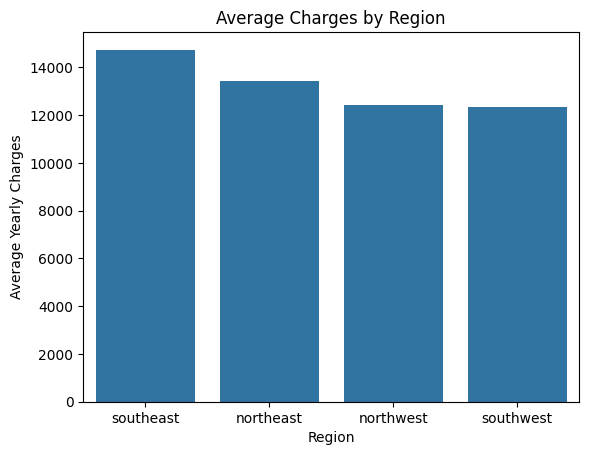

In [ ]:
# 1.1.1 Grouping and Visualizing Data

rouped_by_region = insurance.groupby('region')['charges'].mean().sort_values(ascending=False)
# Groups data by 'region', calculates the mean of 'charges' for each group, and sorts the results in descending order.

sns.barplot(x=grouped_by_region.index, y=grouped_by_region.values)
# Creates a bar plot with regions on the x-axis and average charges on the y-axis.

plt.xlabel('Region') # Sets the label for the x-axis.
plt.ylabel('Average Yearly Charges') # Sets the label for the y-axis.
plt.title('Average Charges by Region') # Sets the title for the plot.

plt.show()

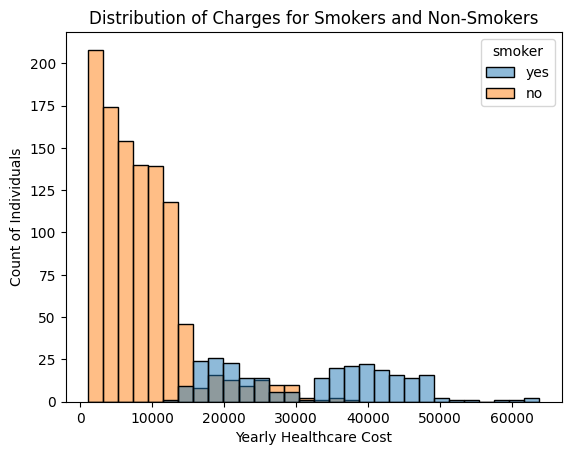

In [ ]:
# 1.1.2 Grouping and Visualizing Data

sns.histplot(data=insurance, x='charges', hue='smoker')
# Creates a histogram of 'charges', with bars differentiated by 'smoker' status.

plt.xlabel('Yearly Healthcare Cost') # Sets the label for the x-axis.
plt.ylabel('Count of Individuals') # Sets the label for the y-axis.
plt.title('Distribution of Charges for Smokers and Non-Smokers') # Sets the title for the plot.

plt.show()

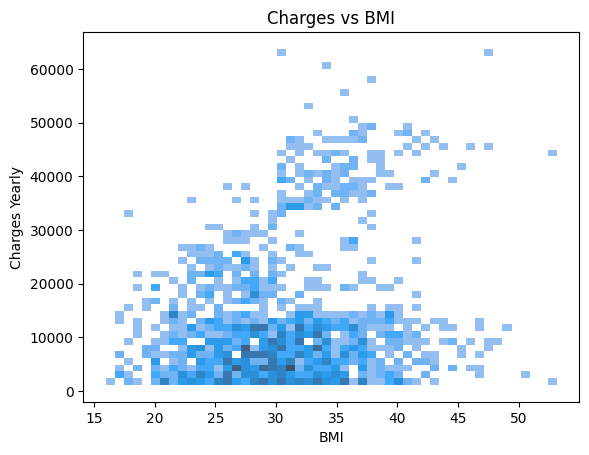

In [ ]:
# 1.1.3 Grouping and Visualizing Data

sns.histplot(data=insurance, x='bmi', y='charges', bins=50)
# Creates a 2D histogram with 'bmi' on the x-axis and 'charges' on the y-axis, divided into 50 bins.

plt.xlabel('BMI') # Sets the label for the x-axis.
plt.ylabel('Charges Yearly') # Sets the label for the y-axis.
plt.title('Charges vs BMI') # Sets the title for the plot.

plt.show()

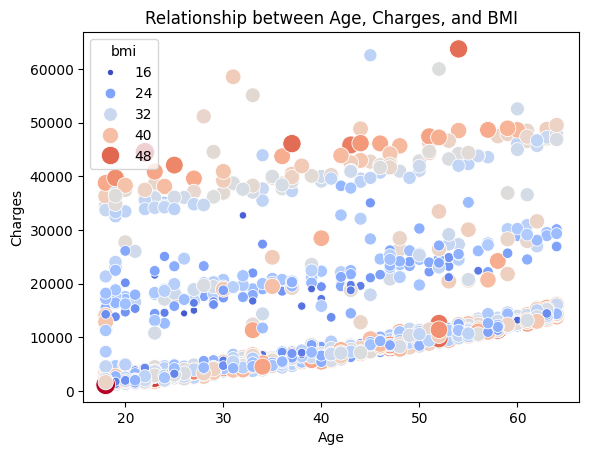

In [ ]:
# 1.1.4 Grouping and Visualizing Data

sns.scatterplot(data=insurance, x='age', y='charges', hue='bmi', size='bmi', sizes=(20, 200), palette='coolwarm')
# Creates a scatter plot showing the relationship between 'age' (x-axis) and 'charges' (y-axis), with points colored by 'bmi'
# and sized proportionally to 'bmi'.

plt.xlabel('Age') # Sets the label for the x-axis.
plt.ylabel('Charges') # Sets the label for the y-axis.
plt.title('Relationship between Age, Charges, and BMI') # Sets the title for the plot.

plt.show()

### 2.4 Correlation

In [ ]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MSRP = pd.read_csv('/content/car_sales.csv')
MSRP.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


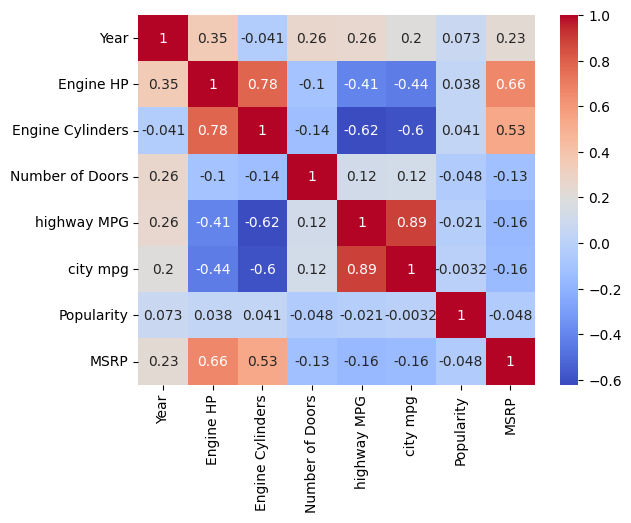

In [ ]:
# 1.1.1 Correlation - Pearson
  # Measures the strength and direction of the linear relationship between two variables
  # Standardized

corr_pearson = MSRP.corr(method='pearson', numeric_only=True)
# Calculates the Pearson correlation coefficients for numeric columns in the dataset (linear relationships).

sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
# Visualizes the Pearson correlation matrix as a heatmap, with annotations and a coolwarm color scheme.

plt.show()

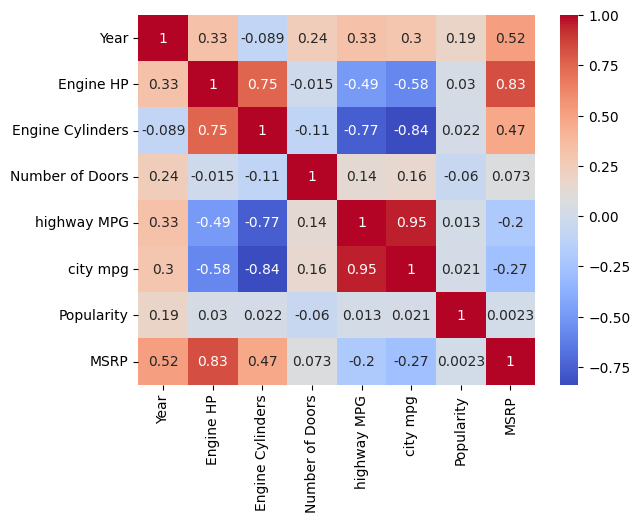

In [ ]:
# 1.1.2 Correlation - Spearman

corr_spearman = MSRP.corr(method='spearman', numeric_only=True)
# Calculates the Spearman correlation coefficients (rank-based correlations).

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm')
# Visualizes the Spearman correlation matrix as a heatmap.

plt.show()

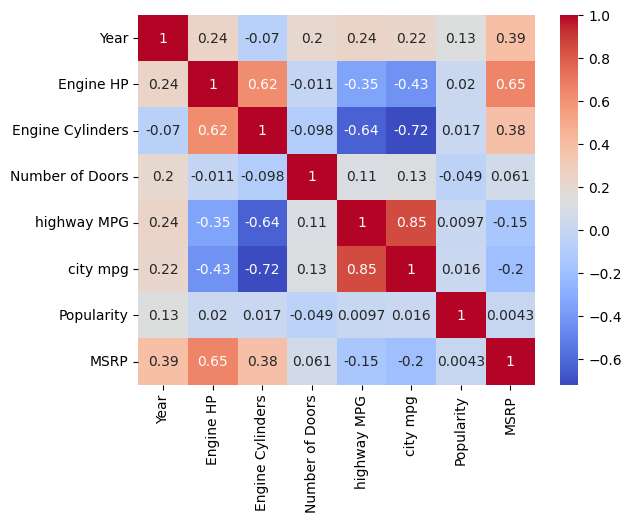

In [ ]:
# 1.1.3 Correlation - Kendall

corr_kendall = MSRP.corr(method='kendall', numeric_only=True)
# Calculates the Kendall correlation coefficients (rank-based with ties considered).

sns.heatmap(corr_kendall, annot=True, cmap='coolwarm')
# Visualizes the Kendall correlation matrix as a heatmap.

plt.show()

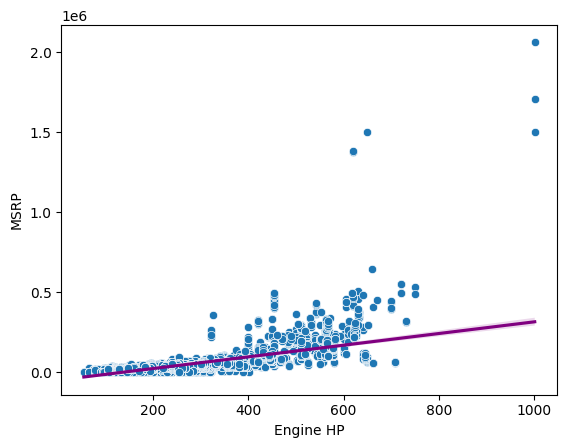

In [ ]:
# 1.1.4 Correlation - Scatter

sns.scatterplot(data=MSRP, x='Engine HP', y='MSRP')
# Creates a scatter plot for 'Engine HP' (x-axis) vs 'MSRP' (y-axis).

sns.regplot(data=MSRP, x='Engine HP', y='MSRP', scatter=False, color='purple')
# Adds a regression line (without scatter points) to show the trend.

plt.show()

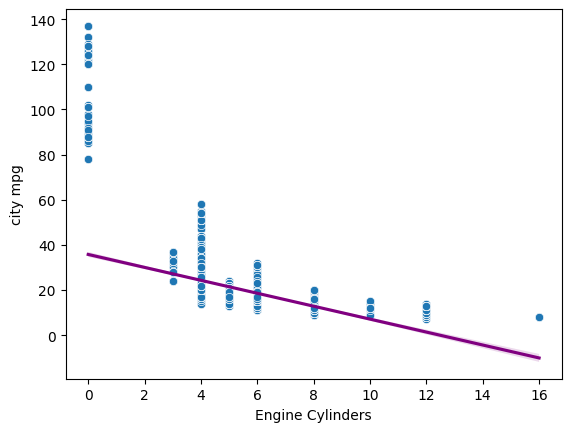

In [ ]:
# 1.1.5 Correlation - Scatter

sns.scatterplot(data=MSRP, x='Engine Cylinders', y='city mpg')
# Creates a scatter plot for 'Engine Cylinders' (x-axis) vs 'city mpg' (y-axis).

sns.regplot(data=MSRP, x='Engine Cylinders', y='city mpg', scatter=False, color='purple')
# Adds a regression line (without scatter points) to show the trend.

plt.show()

### 2.5 Time Series Analysis

In [ ]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

aliens = pd.read_csv('/content/alien_sightings.csv')
aliens.head(3)

<ipython-input-80-cc72479e11e3>:7: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  aliens = pd.read_csv('/content/alien_sightings.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667


In [ ]:
# 1.1.1 Time Series Analysis: Data Type Change

aliens['datetime'] = pd.to_datetime(aliens['datetime'])  # Converts 'datetime' column to datetime64 format for time-based operations.

aliens['duration (seconds)'] = aliens['duration (seconds)'].str.replace('`', '')  # Removes backticks (`) from the 'duration (seconds)' column.
aliens['duration (seconds)'] = pd.to_numeric(aliens['duration (seconds)'])  # Converts 'duration (seconds)' column to numeric type for analysis.

aliens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              88679 non-null  datetime64[ns]
 1   city                  88679 non-null  object        
 2   state                 81270 non-null  object        
 3   country               76314 non-null  object        
 4   shape                 85757 non-null  object        
 5   duration (seconds)    65535 non-null  float64       
 6   duration (hours/min)  85660 non-null  object        
 7   comments              88644 non-null  object        
 8   date posted           88679 non-null  object        
 9   latitude              88679 non-null  object        
 10  longitude             88679 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 7.4+ MB


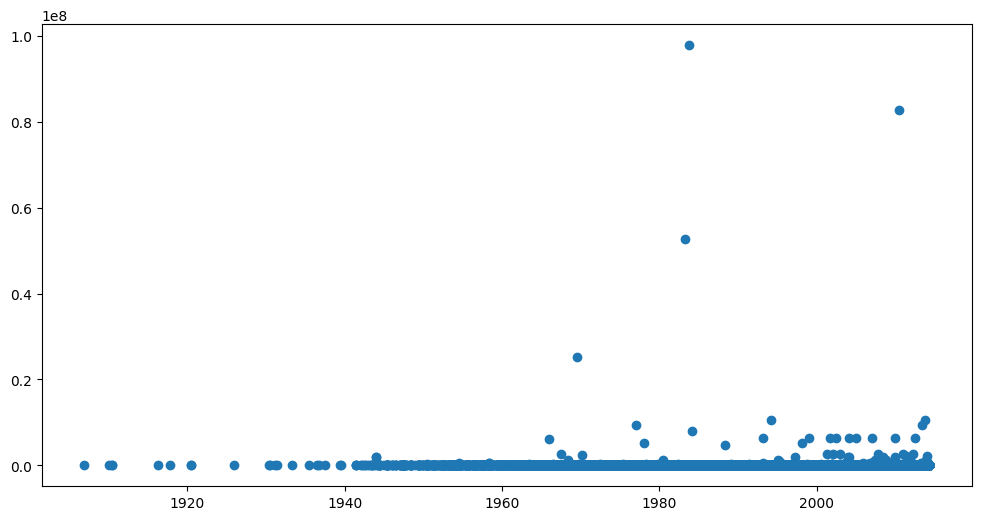

In [ ]:
# 1.1.2 Time Series Analysis

plt.figure(figsize=(12,6))  # Sets the figure size for better visualization.
plt.scatter(aliens['datetime'], aliens['duration (seconds)'])  # Creates a scatter plot of 'datetime' vs 'duration (seconds)'.

plt.show()

In [ ]:
# 1.2.1 Time Series Analysis

aliens.set_index('datetime', inplace=True)  # Sets the 'datetime' column as the index for time series operations.
aliens.head(3)

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667


In [ ]:
# 1.2.2 Time Series Analysis

aliens.resample('M').count()  # Resamples the data to monthly frequency and counts occurrences for each month.

<ipython-input-84-555c0e95acc5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aliens.resample('M').count()


,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
1906-11-30,1,0,0,1,1,1,1,1,1,1
1906-12-31,0,0,0,0,0,0,0,0,0,0
1907-01-31,0,0,0,0,0,0,0,0,0,0
1907-02-28,0,0,0,0,0,0,0,0,0,0
1907-03-31,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2014-01-31,696,664,623,678,696,679,696,696,696,696
2014-02-28,528,506,472,518,528,509,528,528,528,528
2014-03-31,496,456,442,487,496,480,496,496,496,496


<ipython-input-86-77a59a93d5cf>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = aliens.resample('M').count()


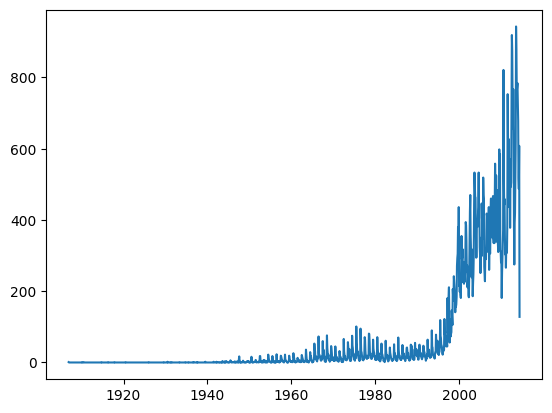

In [ ]:
# 1.2.3 Time Series Analysis

monthly_counts = aliens.resample('M').count()  # Resamples data to monthly frequency and counts occurrences.
plt.plot(monthly_counts.index, monthly_counts['shape'])  # Plots monthly counts of 'shape' over time.

plt.show()

<ipython-input-87-dc0b2f63a33a>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  monthly_counts_year = aliens.resample('Y').count()


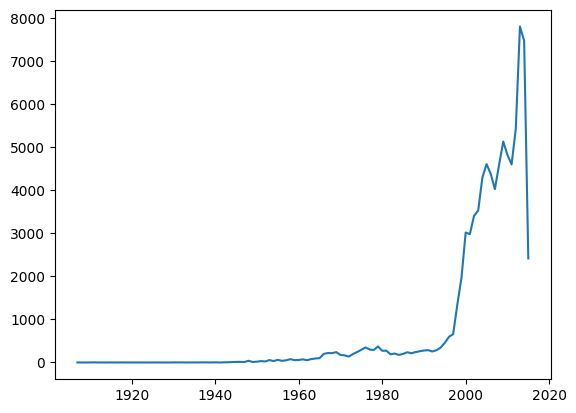

In [ ]:
# 1.2.4 Time Series Analysis

monthly_counts_year = aliens.resample('Y').count()  # Resamples data to yearly frequency and counts occurrences.
plt.plot(monthly_counts_year.index, monthly_counts_year['shape'])  # Plots yearly counts of 'shape' over time.

plt.show()

In [ ]:
# 1.3.1 Time Series Analysis

aliens.groupby('country').resample('Y').size().unstack(level=0)
# Groups by 'country' and resamples to yearly frequency, calculates the size of each group, and unpacks results into a DataFrame.

<ipython-input-89-0a6cced94f0f>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  aliens.groupby('country').resample('Y').size().unstack(level=0)


country,au,ca,de,gb,us
datetime,,,,,
1910-12-31,NaN,NaN,NaN,NaN,3.0
1911-12-31,NaN,NaN,NaN,NaN,0.0
1912-12-31,NaN,NaN,NaN,NaN,0.0
1913-12-31,NaN,NaN,NaN,NaN,0.0
1914-12-31,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...
2010-12-31,17.0,154.0,4.0,119.0,3825.0
2011-12-31,14.0,140.0,3.0,56.0,4666.0
2012-12-31,20.0,251.0,6.0,87.0,6749.0


<ipython-input-90-d2bafd0f2dc6>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sightings_by_country = aliens.groupby('country').resample('Y').size().unstack(level=0)


<Axes: xlabel='datetime'>

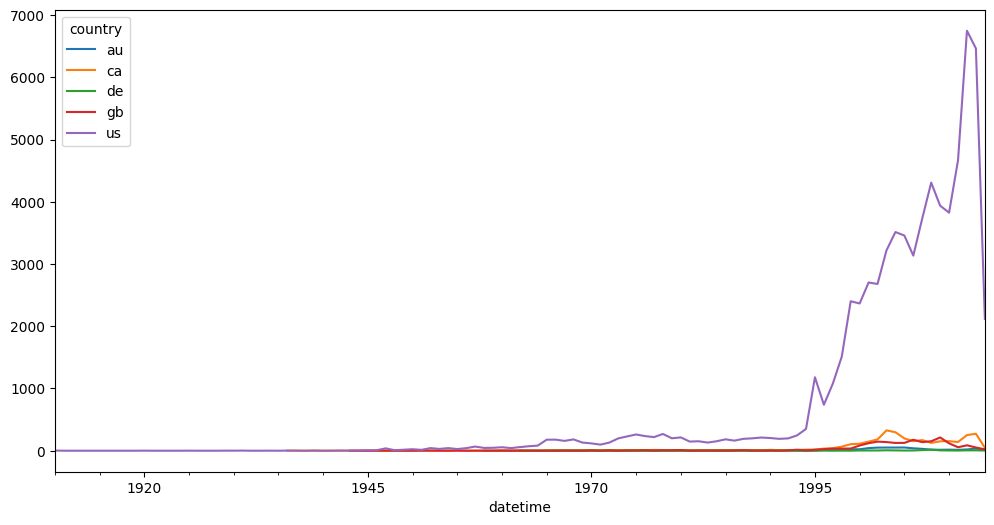

In [ ]:
# 1.3.2 Time Series Analysis

sightings_by_country = aliens.groupby('country').resample('Y').size().unstack(level=0)
# Groups by 'country' and resamples to yearly frequency, calculates size, and reshapes the result for easier plotting.

sightings_by_country.plot(figsize=(12, 6))  # Plots the yearly sightings by country with a large figure size.

## 3.0 Polars

### 3.1 Polars Introduction
- Dataframe library in Python and is inspired by Pandas
- Meant to be a more advanced Pandas in speed of execution and handling larger amounts of data
- Not as mature as Pandas
- Not as widely supported, but is becoming more popular

### 3.2 Polars Basic

In [ ]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setup
!pip install polars
import polars as pl

In [ ]:
# 1.1.1 Polars Basic

insurance = pl.read_csv('/content/health_insurance.csv')  # Reads the CSV file into a Polars DataFrame.
insurance

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552
…,…,…,…,…,…,…
50,"""male""",30.97,3,"""no""","""northwest""",10600.5483
18,"""female""",31.92,0,"""no""","""northeast""",2205.9808
18,"""female""",36.85,0,"""no""","""southeast""",1629.8335


In [ ]:
# 1.1.2 Polars Basic

insurance.select(pl.col('smoker', 'sex'))  # Selects the 'smoker' and 'sex' columns from the DataFrame.

smoker,sex
str,str
"""yes""","""female"""
"""no""","""male"""
"""no""","""male"""
"""no""","""male"""
"""no""","""male"""
…,…
"""no""","""male"""
"""no""","""female"""
"""no""","""female"""


In [ ]:
# 1.1.3 Polars Basic

insurance.select(pl.col('*'))  # Selects all columns from the DataFrame.

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552
…,…,…,…,…,…,…
50,"""male""",30.97,3,"""no""","""northwest""",10600.5483
18,"""female""",31.92,0,"""no""","""northeast""",2205.9808
18,"""female""",36.85,0,"""no""","""southeast""",1629.8335


In [ ]:
# 1.1.3 Polars Basic

insurance_month = insurance.with_columns((pl.col('charges')/12).alias('charges_per_month')) # Creates a new column 'charges_per_month' by dividing the 'charges' column by 12.
insurance_month

age,sex,bmi,children,smoker,region,charges,charges_per_month
i64,str,f64,i64,str,str,f64,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924,1407.077
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523,143.796025
28,"""male""",33.0,3,"""no""","""southeast""",4449.462,370.7885
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061,1832.039217
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552,322.237933
…,…,…,…,…,…,…,…
50,"""male""",30.97,3,"""no""","""northwest""",10600.5483,883.379025
18,"""female""",31.92,0,"""no""","""northeast""",2205.9808,183.831733
18,"""female""",36.85,0,"""no""","""southeast""",1629.8335,135.819458


In [ ]:
# 1.1.4 Polars Basic

insurance_month.filter((pl.col('age') >= 30) & (pl.col('sex') == 'male')) # Filters rows where 'age' is greater than or equal to 30 and 'sex' is 'male'.

age,sex,bmi,children,smoker,region,charges,charges_per_month
i64,str,f64,i64,str,str,f64,f64
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061,1832.039217
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552,322.237933
37,"""male""",29.83,2,"""no""","""northeast""",6406.4107,533.867558
56,"""male""",40.3,0,"""no""","""southwest""",10602.385,883.532083
30,"""male""",35.3,0,"""yes""","""southwest""",36837.467,3069.788917
…,…,…,…,…,…,…,…
31,"""male""",25.935,1,"""no""","""northwest""",4239.89265,353.324387
61,"""male""",33.535,0,"""no""","""northeast""",13143.33665,1095.278054
51,"""male""",30.03,1,"""no""","""southeast""",9377.9047,781.492058


In [ ]:
# Setup

data1 = {
    'employee_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'name': ['Michael Scott', 'Jim Halpert', 'Pam Beesly', 'Dwight Schrute', 'Angela Martin', 'Kevin Malone', 'Oscar Martinez', 'Stanley Hudson'],
    'job_title': ['Regional Manager', 'Sales Representative', 'Receptionist', 'Assistant to the Regional Manager', 'Head of Accounting', 'Accountant', 'Accountant', 'Sales Representative'],
    'salary': [100000, 60000, 55000, 65000, 60000, 55000, 55000, 60000]
}

df1 = pl.DataFrame(data1)

data2 = {
    'employee_id': [1, 2, 3, 5, 6, 7, 8, 9],
    'name': ['Michael Scott', 'Jim Halpert', 'Pam Beesly', 'Angela Martin', 'Kevin Malone', 'Oscar Martinez', 'Stanley Hudson', 'Phyllis Vance'],
    'department': ['Management', 'Sales', 'Reception', 'Accounting', 'Accounting', 'Accounting', 'Sales', 'Sales']
}

df2 = pl.DataFrame(data2)

print('df1', '\n')
print(df1, '\n')
print('df2', '\n')
print(df2)

df1 

shape: (8, 4)
┌─────────────┬────────────────┬─────────────────────────────────┬────────┐
│ employee_id ┆ name           ┆ job_title                       ┆ salary │
│ ---         ┆ ---            ┆ ---                             ┆ ---    │
│ i64         ┆ str            ┆ str                             ┆ i64    │
╞═════════════╪════════════════╪═════════════════════════════════╪════════╡
│ 1           ┆ Michael Scott  ┆ Regional Manager                ┆ 100000 │
│ 2           ┆ Jim Halpert    ┆ Sales Representative            ┆ 60000  │
│ 3           ┆ Pam Beesly     ┆ Receptionist                    ┆ 55000  │
│ 4           ┆ Dwight Schrute ┆ Assistant to the Regional Mana… ┆ 65000  │
│ 5           ┆ Angela Martin  ┆ Head of Accounting              ┆ 60000  │
│ 6           ┆ Kevin Malone   ┆ Accountant                      ┆ 55000  │
│ 7           ┆ Oscar Martinez ┆ Accountant                      ┆ 55000  │
│ 8           ┆ Stanley Hudson ┆ Sales Representative            ┆ 6

In [ ]:
# 1.2.1 Polars Basic

df1.join(df2, on = 'employee_id', how = 'inner')

# Performs an inner join on 'employee_id', returning rows with matching values in both DataFrames.

employee_id,name,job_title,salary,name_right,department
i64,str,str,i64,str,str
1,"""Michael Scott""","""Regional Manager""",100000,"""Michael Scott""","""Management"""
2,"""Jim Halpert""","""Sales Representative""",60000,"""Jim Halpert""","""Sales"""
3,"""Pam Beesly""","""Receptionist""",55000,"""Pam Beesly""","""Reception"""
5,"""Angela Martin""","""Head of Accounting""",60000,"""Angela Martin""","""Accounting"""
6,"""Kevin Malone""","""Accountant""",55000,"""Kevin Malone""","""Accounting"""
7,"""Oscar Martinez""","""Accountant""",55000,"""Oscar Martinez""","""Accounting"""
8,"""Stanley Hudson""","""Sales Representative""",60000,"""Stanley Hudson""","""Sales"""


In [ ]:
# 1.2.2 Polars Basic

df1.join(df2, on = 'employee_id', how = 'semi')

# Performs a semi join on 'employee_id', returning rows from df1 that have a match in df2.

employee_id,name,job_title,salary
i64,str,str,i64
1,"""Michael Scott""","""Regional Manager""",100000
2,"""Jim Halpert""","""Sales Representative""",60000
3,"""Pam Beesly""","""Receptionist""",55000
5,"""Angela Martin""","""Head of Accounting""",60000
6,"""Kevin Malone""","""Accountant""",55000
7,"""Oscar Martinez""","""Accountant""",55000
8,"""Stanley Hudson""","""Sales Representative""",60000


In [ ]:
# 1.2.3 Polars Basic

df1.join(df2, on = 'employee_id', how = 'anti')

# Performs an anti join on 'employee_id', returning rows from df1 that do not have a match in df2.

employee_id,name,job_title,salary
i64,str,str,i64
4,"""Dwight Schrute""","""Assistant to the Regional Mana…",65000


In [ ]:
# 1.2.4 Polars Basic

df1.join(df2, how = 'cross')

# Performs a cross join, combining each row in df1 with every row in df2.

employee_id,name,job_title,salary,employee_id_right,name_right,department
i64,str,str,i64,i64,str,str
1,"""Michael Scott""","""Regional Manager""",100000,1,"""Michael Scott""","""Management"""
1,"""Michael Scott""","""Regional Manager""",100000,2,"""Jim Halpert""","""Sales"""
1,"""Michael Scott""","""Regional Manager""",100000,3,"""Pam Beesly""","""Reception"""
1,"""Michael Scott""","""Regional Manager""",100000,5,"""Angela Martin""","""Accounting"""
1,"""Michael Scott""","""Regional Manager""",100000,6,"""Kevin Malone""","""Accounting"""
…,…,…,…,…,…,…
8,"""Stanley Hudson""","""Sales Representative""",60000,5,"""Angela Martin""","""Accounting"""
8,"""Stanley Hudson""","""Sales Representative""",60000,6,"""Kevin Malone""","""Accounting"""
8,"""Stanley Hudson""","""Sales Representative""",60000,7,"""Oscar Martinez""","""Accounting"""
